# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip']

0        19525.0
1        19446.0
2        19401.0
3        19401.0
4            NaN
          ...   
99487    19401.0
99488    19003.0
99489    19401.0
99490    19002.0
99491    19446.0
Name: zip, Length: 99492, dtype: float64

In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [11]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
EMS: DISABLED VEHICLE                  1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
EMS: BOMB DEVICE FOUND                 1
Fire: SYNCOPAL EPISODE                 1
Name: title, Length: 110, dtype: int64

In [12]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [13]:
df['title'].nunique()

110

In [14]:
len(df['title'].unique())

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [16]:
df['title'][0]

'EMS: BACK PAINS/INJURY'

In [17]:
df['title'][0].split(':')

['EMS', ' BACK PAINS/INJURY']

In [18]:
df['title'][0].split(':')[0]

'EMS'

In [19]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [20]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [21]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

** What is the most common Reason for a 911 call based off of this new column? **

In [22]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<Axes: xlabel='Reason', ylabel='count'>

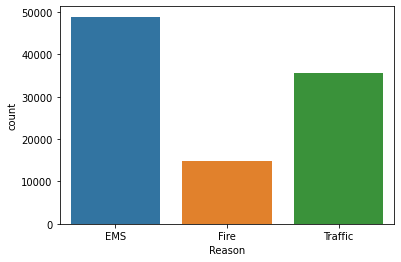

In [24]:
import seaborn as sns
sns.countplot(x='Reason', data=df)

<Axes: xlabel='Reason', ylabel='count'>

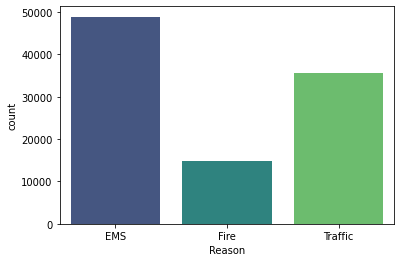

In [25]:
sns.countplot(x='Reason', data=df, palette='viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [26]:
df['timeStamp'][0]

'2015-12-10 17:40:00'

In [27]:
type(df['timeStamp'])

pandas.core.series.Series

In [29]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [31]:
pd.to_datetime(df['timeStamp'])

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [32]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [33]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [35]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [36]:
time.month

12

In [37]:
time.day

10

In [38]:
time.dayofweek

3

In [41]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [42]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month  Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12            3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12            3  
2                    HAWS AVE  1   Fire    17     12            3  
3          AIRY ST & SWEDE ST  1    EMS    17     12            3  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12            3

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [43]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [44]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [45]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12         Thu  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12         Thu  
2                    HAWS AVE  1   Fire    17     12         Thu  
3          AIRY ST & SWEDE ST  1    EMS    17     12         Thu  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12         Thu

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

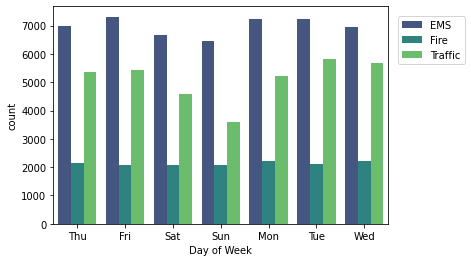

In [60]:
import matplotlib.pyplot as plt
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=1)

**Now do the same for Month:**

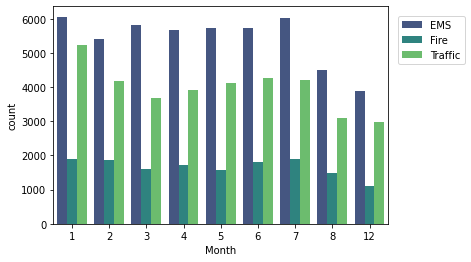

In [62]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=1)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [65]:
byMonth = df.groupby('Month')
byMonth.head()

lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
7969   40.121354 -75.363829   
7970   40.140505 -75.310874   
7971   40.246837 -75.681381   
7972   40.097222 -75.376195   
7973   40.148432 -75.219812   
21174  40.185223 -75.450603   
21175  40.022714 -75.320863   
21176  40.225099 -75.207651   
21177  40.082193 -75.298077   
21178  40.289027 -75.399590   
32641  40.155369 -75.124353   
32642  40.376257 -75.482552   
32643  40.380733 -75.485467   
32644  40.153739 -75.457630   
32645  40.097222 -75.376195   
43742  40.162804 -75.097848   
43743  40.024967 -75.282905   
43744  40.223952 -75.347085   
43745  40.223952 -75.347085   
43746  40.178442 -75.128506   
55068  40.210101 -75.275821   
55069  40.070388 -75.143996   
55070  40.191397 -75.458221   
55071  40.185660 -75.451571   
55072  40.288861 -75.267753   
66491  40.082981 -75.206303   
66492  40.258253 -75.248230   
66493  40.242739 -75.217067   
66494  40.160197 -75.217753   
66495  40.100423 -75.207064   
78277  40.245448 -75.433483   
78278  40.309149 -75.356491   
78279  40.246539 -75.648820   
78280  40.129012 -75.334741   
78281  40.400194 -75.499713   
90414  40.111326 -75.127148   
90415  40.137376 -75.502518   
90416  40.137450 -75.475365   
90417  40.155827 -75.365208   
90418  40.179084 -75.095875   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
7969   ROSEMONT AVE & W WASHINGTON ST;  NORRISTOWN; S...  19401.0   
7970   GERMANTOWN PIKE & HANNAH AVE;  EAST NORRITON; ...  19401.0   
7971   VINE ST & CENTER ST;  WEST POTTSGROVE; Station...  19464.0   
7972   MARK LN & DEAD END;  UPPER MERION; Station 317...      NaN   
7973   BANNOCKBURN AVE & S SPRING GARDEN ST;  AMBLER;...  19002.0   
21174  2ND AVE & E MAIN ST; COLLEGEVILLE; 2016-02-01 ...  19426.0   
21175  MERION AVE & W LANCASTER AVE;  LOWER MERION; S...  19010.0   
21176  HORSHAM RD & GREEN TREE TAVERN RD;  HORSHAM; S...  19454.0   
21177  FAYETTE ST & W 11TH AVE;  CONSHOHOCKEN; Statio...  19428.0   
21178  MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...  19438.0   
32641  RUSSELL RD & ANDREA DR;  UPPER MORELAND; Stati...  19090.0   
32642  MAIN ST & W 5TH ST; RED HILL; 2016-03-01 @ 00:...  18076.0   
32643  MAIN ST & W 8TH ST; RED HILL; 2016-03-01 @ 00:...  18076.0   
32644  ARCOLA RD & PERKIOMEN TRL; UPPER PROVIDENCE; 2...  19426.0   
32645  GROVE LN & DEAD END;  UPPER MERION; Station 31...      NaN   
43742  YORK RD & TURNPIKE OVERPASS; UPPER MORELAND; 2...  19040.0   
43743  SCHUYLKILL EXPY & RR UNDERPASS; LOWER MERION; ...      NaN   
43744  MORRIS RD & HENNING WAY; TOWAMENCIN; 2016-04-0...  19446.0   
43745  MORRIS RD & HENNING WAY; TOWAMENCIN; 2016-04-0...  19446.0   
43746  RIDGEVIEW DR & DEAD END; HORSHAM; 2016-04-01 @...      NaN   
55068  MAIN ST & E MONTGOMERY AVE;  NORTH WALES; Stat...  19454.0   
55069  PENROSE AVE & BEECH AVE;  CHELTENHAM; Station ...  19027.0   
55070  MAIN ST & 6TH AVE;  COLLEGEVILLE; Station 324;...  19426.0   
55071  MAIN CAMPUS DR & DEAD END;  COLLEGEVILLE; Stat...  19426.0   
55072  BETHLEHEM PIKE & ORVILLA RD; BUCKS COUNTY; 201...  19440.0   
66491  STENTON AVE & NEWTON ST;  SPRINGFIELD; Station...  19038.0   
66492  BETHLEHEM PIKE & TAYLOR RD;  MONTGOMERY; Stati...  19446.0   
66493  STUMP RD & STEEPLECHASE DR;  MONTGOMERY; Stati...  19454.0   
66494  FOREST AVE & GLEN MAWR DR;  AMBLER; Station 35...  19002.0   
66495  RT309 EXPY & PAPER MILL RD UNDERPASS; SPRINGFI...      NaN   
78277  CHANDLER LN & WENTZ LN; SKIPPACK; 2016-07-01 @...  19473.0   
78278  LONGCHAMP DR & DEAD END;  

In [66]:
byMonth = df.groupby('Month').count()
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month'>

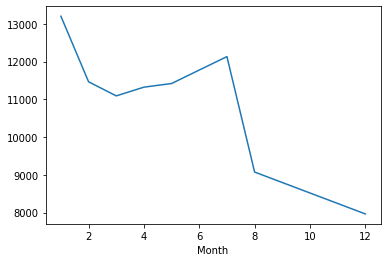

In [67]:
byMonth['twp'].plot()

<Axes: xlabel='Month'>

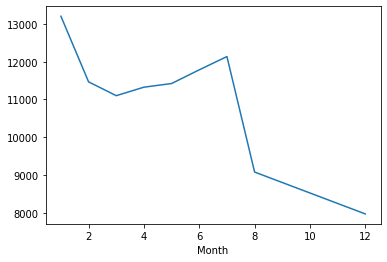

In [68]:
byMonth['Hour'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [69]:
byMonth.reset_index()

Month    lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
0      1  13205  13205  13205  11527  13205      13205  13203  13096  13205   
1      2  11467  11467  11467   9930  11467      11467  11465  11396  11467   
2      3  11101  11101  11101   9755  11101      11101  11092  11059  11101   
3      4  11326  11326  11326   9895  11326      11326  11323  11283  11326   
4      5  11423  11423  11423   9946  11423      11423  11420  11378  11423   
5      6  11786  11786  11786  10212  11786      11786  11777  11732  11786   
6      7  12137  12137  12137  10633  12137      12137  12133  12088  12137   
7      8   9078   9078   9078   7832   9078       9078   9073   9025   9078   
8     12   7969   7969   7969   6907   7969       7969   7963   7916   7969   

   Reason   Hour  Day of Week  
0   13205  13205        13205  
1   11467  11467        11467  
2   11101  11101        11101  
3   11326  11326        11326  
4   11423  11423        11423  
5   11786  11786        11786  
6   12137  12137        12137  
7    9078   9078         9078  
8    7969   7969         7969

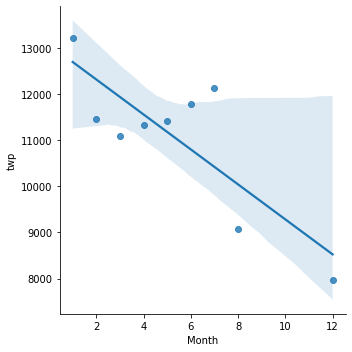

In [70]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [72]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day of Week        Date  
0      REINDEER CT & DEAD END  1    EMS    17     12         Thu  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12         Thu  2015-12-10  
2                    HAWS AVE  1   Fire    17     12         Thu  2015-12-10  
3          AIRY ST & SWEDE ST  1    EMS    17     12         Thu  2015-12-10  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12         Thu  2015-12-10

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

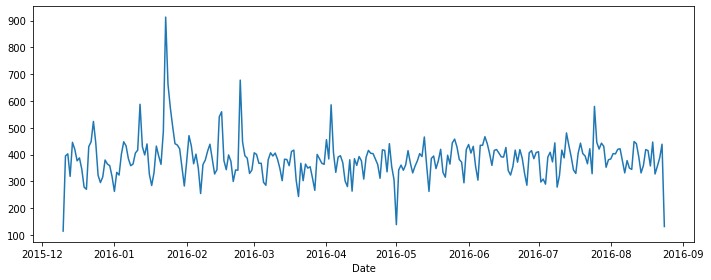

In [76]:
df.groupby('Date').count()['twp'].plot(figsize=(10,4))
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

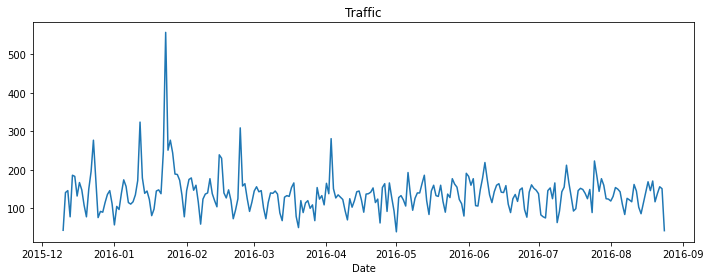

In [77]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(10,4))
plt.title('Traffic')
plt.tight_layout()

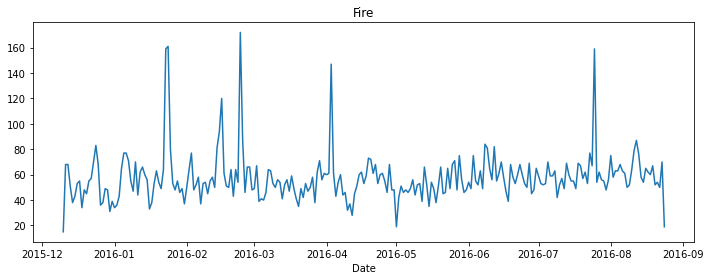

In [78]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(figsize=(10,4))
plt.title('Fire')
plt.tight_layout()

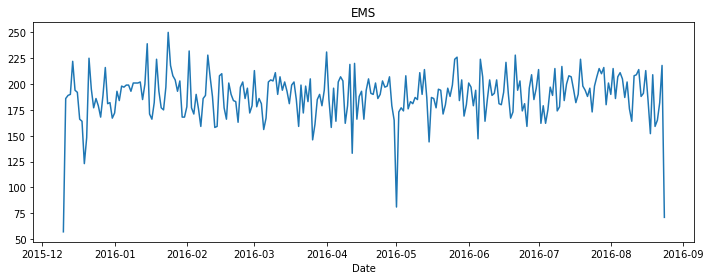

In [79]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(figsize=(10,4))
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [81]:
df.groupby(by=['Day of Week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [83]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason']

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [84]:
df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
Day of Week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon          282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat          375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   
Tue          269  240  186  170  209  239  415  655  889  880  ...  943  938   
Wed          250  216  189  209  156  255  410  701  875  808  ...  904  867   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  
Tue          1026  1019  905  731  647  571  462  274  
Wed           990  1037  894  686  668  575  490  335  

[7 rows x 24 columns]

In [85]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
Day of Week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon          282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat          375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  

[5 rows x 24 columns]

** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of Week'>

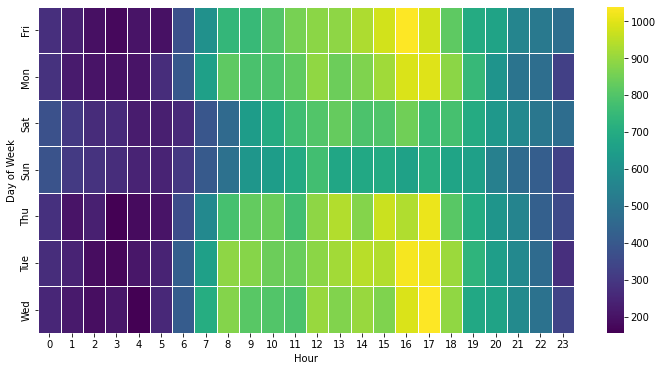

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis', lw=1)

** Now create a clustermap using this DataFrame. **

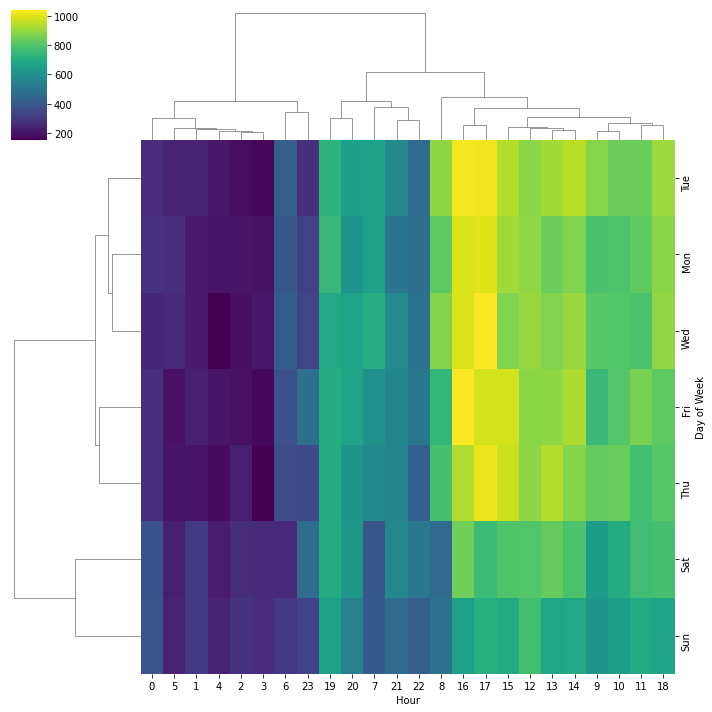

In [88]:
sns.clustermap(dayHour, cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [89]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Fri          1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon          1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat          2291  1441  1266  1734  1444  1388  1695  1099   978
Sun          1960  1229  1102  1488  1424  1333  1672  1021   907
Thu          1584  1596  1900  1601  1590  2065  1646  1230  1266

<Axes: xlabel='Month', ylabel='Day of Week'>

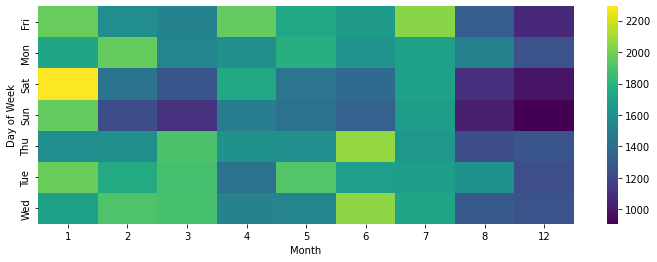

In [92]:
plt.figure(figsize=(12,4))
sns.heatmap(dayMonth, cmap='viridis')

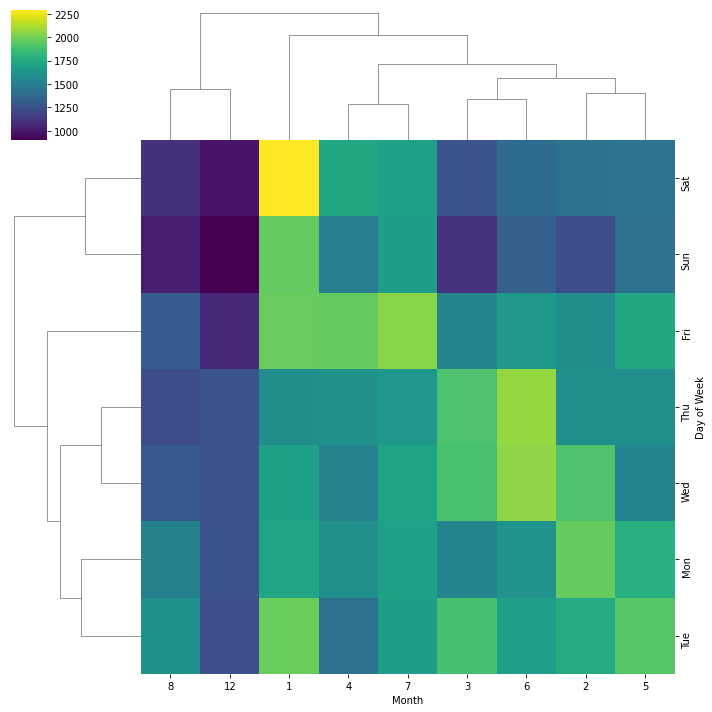

In [93]:
sns.clustermap(dayMonth, cmap='viridis')

**Continue exploring the Data however you see fit!**
# Great Job!

In [94]:
!pip freeze > requirements.txt

In [95]:
with open('requirements.txt','r') as file:
    content = file.read()
    print(content)

absl-py==1.0.0
aiohttp==3.8.4
aiosignal==1.3.1
algorithms==0.1.4
altair==5.5.0
altgraph==0.17.2
annotated-types==0.7.0
appdirs==1.4.4
argon2-cffi==21.1.0
asgiref==3.6.0
aspose-words==22.10.0
asttokens==2.4.1
astunparse==1.6.3
async-timeout==4.0.2
attrs==24.2.0
autopep8==2.3.2
backcall==0.2.0
backports.entry-points-selectable==1.1.0
beautifulsoup4==4.10.0
bleach==4.1.0
blinker==1.4
bokeh==2.4.3
Brotli==1.0.9
bs4==0.0.1
cachetools==4.2.4
certifi==2021.10.8
cffi==1.14.6
chardet==3.0.4
charset-normalizer==2.0.7
chart-studio==1.1.0
click==8.1.8
cloudpickle==3.1.1
cmake==3.26.3
colorama==0.4.4
colorlover==0.3.0
comtypes==1.1.11
contourpy==1.3.0
cryptography==41.0.1
cssselect2==0.7.0
cufflinks==0.17.3
cycler==0.10.0
dacite==1.9.2
dash==2.9.3
dash-bootstrap-components==1.7.1
dash-core-components==2.0.0
dash-daq==0.5.0
dash-html-components==2.0.0
dash-table==5.0.0
dask==2024.2.1
dataclasses-json==0.5.8
dataprep==0.4.5
debugpy==1.4.3
decorator==4.4.2
defusedxml==0.7.1
distlib==0.3.3
Django==4.1.